### Seaborn - 고급 그래프
- matplotlib의 기능과 스타일을 확장한 파이썬 시각 도구의 고급 버전

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [6]:
sns.set_style('darkgrid')

> Age, Fare의 산포도 + 회귀선

<AxesSubplot: xlabel='age', ylabel='fare'>

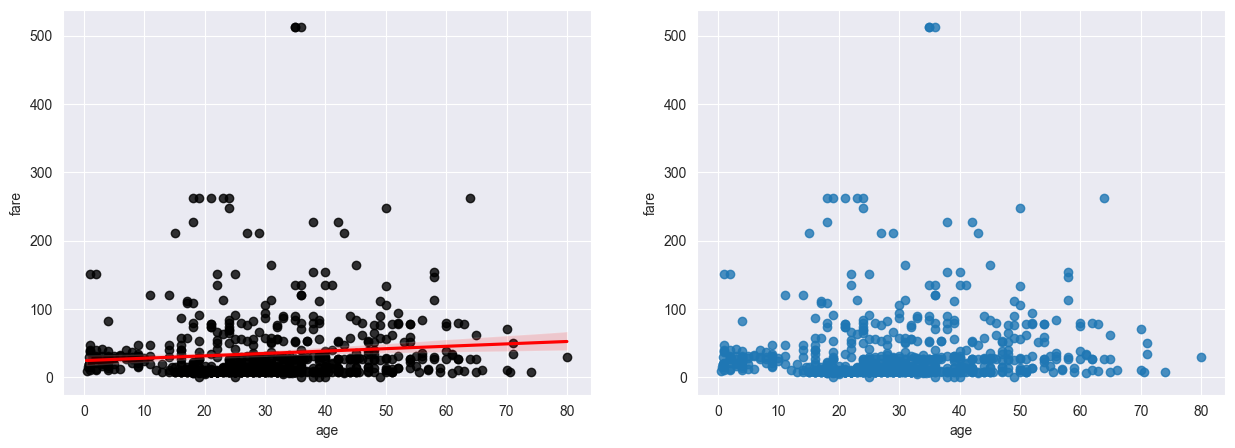

In [13]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

# 1. 선형 회귀선
sns.regplot(
    x=titanic['age'],
    y=titanic['fare'],
    data=titanic,
    scatter_kws={'color':'black'}, # scatter color
    line_kws={'color':'red'}, # regression line color
    # regression line 주변의 퍼져있는 부분은 표준오차 (신뢰구간)을 나타냄
    ax=ax1,
    fit_reg=True
)
sns.regplot(
    x=titanic['age'],
    y=titanic['fare'],
    data=titanic,
    # scatter_kws={'color':'black'}, # scatter color
    # line_kws={'color':'red'}, # regression line color
    ax=ax2,
    fit_reg=False
)


---
### 히스토그램 / 커널 밀도 그래프
- 커널밀도함수는 그래프와 x축 사이의 면적이 1이 되도록 그리는 밀도 분포 함수
- kde: kernel density estimate

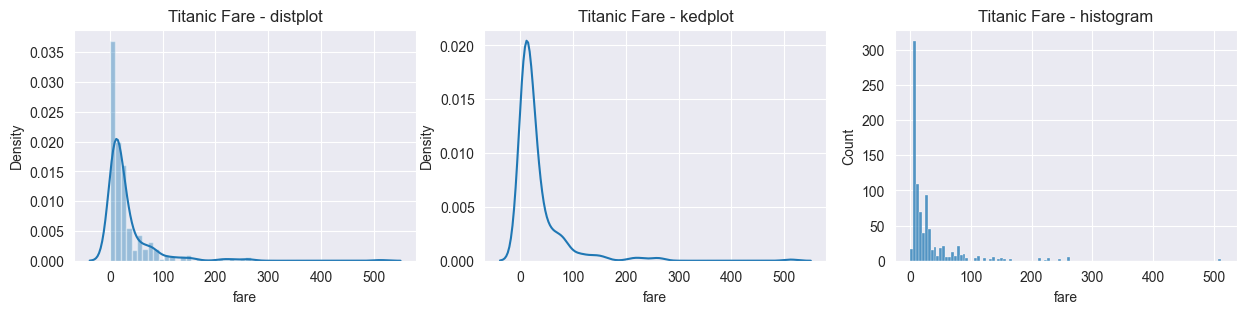

In [38]:
fig = plt.figure(figsize=(15,3))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)
# 1. distplot (히스토그램, 커널밀도)
sns.distplot(
    titanic['fare'],
    ax=ax1,
    # bins=10
    # rug=True
)
# 2. kdeplot (커널밀도)
sns.kdeplot(
    titanic['fare'],
    ax=ax2,
)
# 3. histogram (히스토그램)
sns.histplot(
    titanic['fare'],
    ax=ax3,
)
ax1.set_title('Titanic Fare - distplot')
ax2.set_title('Titanic Fare - kedplot')
ax3.set_title('Titanic Fare - histogram')
plt.show()

> 해석
- 히스토그램에서의 300 데이터는 정규분포와 비교했을 때 의미가 없는 데이터이므로 커널밀도분포에서 제외하고 보여준다.
- 밀도를 통해 분포가 100달러 미만에 집중되어있음을 확인할 수 있음


---
### 히트맵 (heatmap)
- 2개의 범주형 변수를 각각 x, y축에 놓고 데이터를 매트릭스 형태로 분류
- R에서의 table을 시각화하는 개념

In [40]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [39]:
# pclass로는 계산 불가하기 때문에 class라는 컬럼을 먼저 생성한다.
table = titanic.pivot_table(index=['sex'],columns=['class'],aggfunc='size')
# aggfunc='size': data값의 크기를 기준으로 집계한다.
table

class,First,Second,Third
sex,,,
female,94,76,144
male,122,108,347


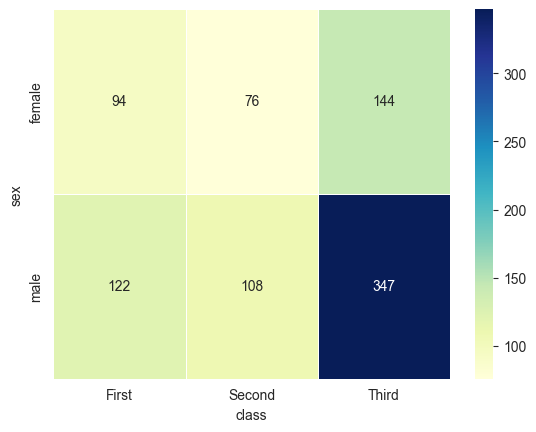

In [51]:
sns.heatmap(
    table,
    annot=True,
    fmt='d', # annotation 포맷 변경 (default: 지수)
    cmap='YlGnBu', # yellow, green, blue
    linewidths=0.5,
    cbar=True # (default=True)
)
plt.show()

---
### 범주형 데이터의 산점도
- strip plot: 카테고리 변수에 대한 y의 분포를 보여주는 산점도
- swarm plot: strip plot과 violin plot의 조합

> Theme : darkgrid, whitegrid, dark, white, ticks

In [66]:
sns.set_style('whitegrid')

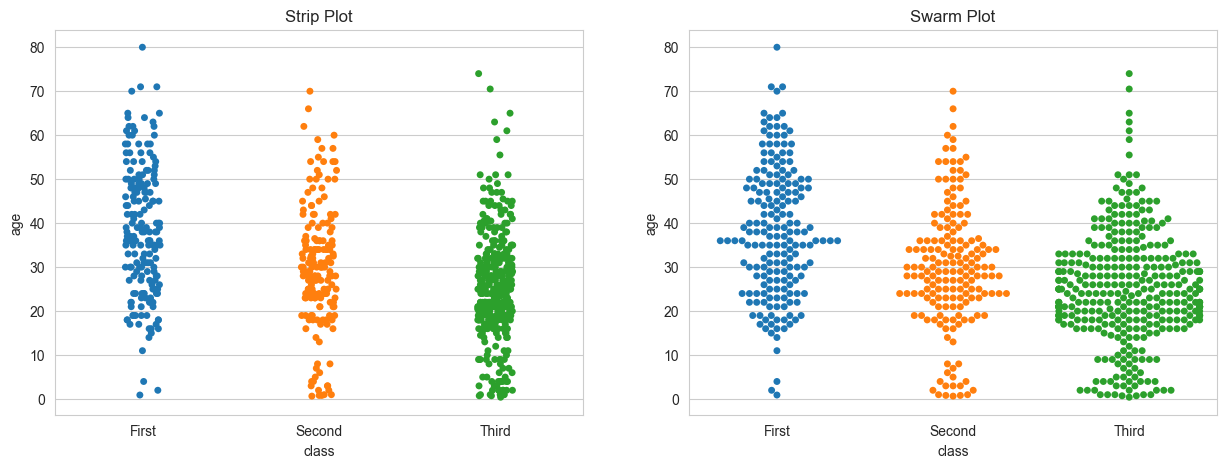

In [71]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

sns.stripplot(
    x='class',
    y='age',
    data=titanic,
    ax=ax1,
    hue='class',
    legend=False
)
sns.swarmplot(
    x='class',
    y='age',
    data=titanic,
    ax=ax2,
    hue='class',
    legend=False
)
ax1.set_title('Strip Plot')
ax2.set_title('Swarm Plot')
plt.show()

---
### 막대그래프
- bar 위의 선: 오차막대 (error bar)
- 오차 막대는 두 값의 차이가 통계학적으로 유의수준 내에 있는지 시각적으로 나타낸다.
- 만약 이 오차막대에 신뢰구간이 아니라 표준편차를 표현하고 싶다면 sns.barplot() 안에 ci="sd"라고 지정하면 된다.

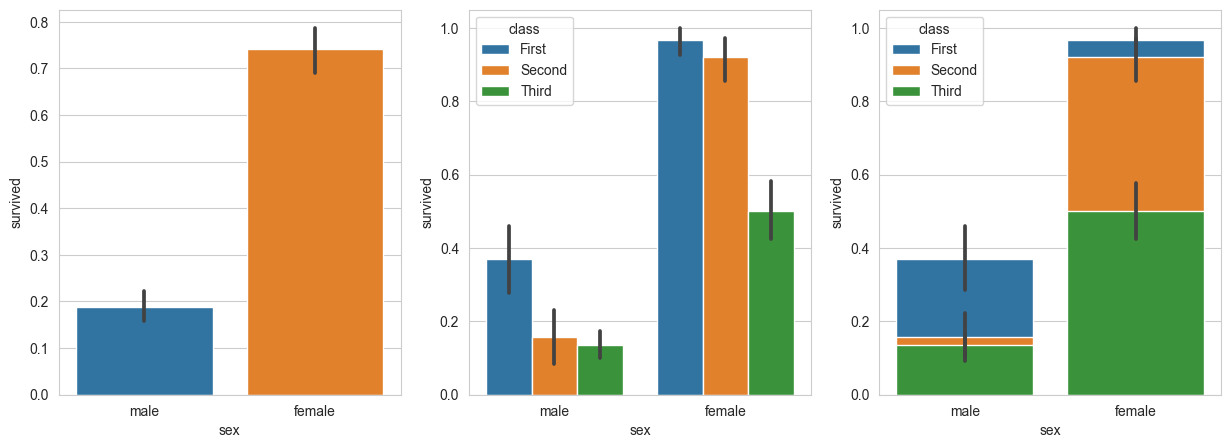

In [81]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

sns.barplot(
    x='sex',
    y='survived',
    data=titanic,
    ax=ax1,
    # ci='sd'
)

sns.barplot(
    x='sex',
    y='survived',
    data=titanic,
    ax=ax2,
    hue='class'
)

sns.barplot(
    x='sex',
    y='survived',
    data=titanic,
    ax=ax3,
    hue='class',
    dodge=False
)
plt.show()

---
### 빈도 그래프

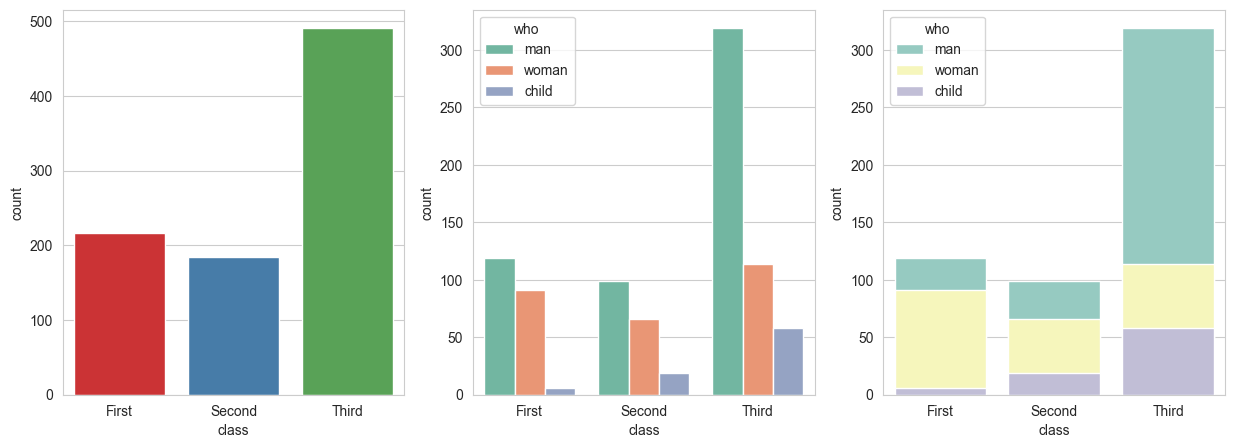

In [87]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

sns.countplot(
    x='class',
    data=titanic,
    ax=ax1,
    palette='Set1'
)
sns.countplot(
    x='class',
    hue='who',
    data=titanic,
    ax=ax2,
    palette='Set2'
)

sns.countplot(
    x='class',
    hue='who',
    data=titanic,
    ax=ax3,
    palette='Set3',
    dodge=False
)

plt.show()

---
### 박스 플롯 / 바이올린 그래프
- 박스플롯은 범주형 데이터의 분포와 주요 통계지표를 제공하지만 데이터의 분산 정도를 알기 어렵다.
- 바이올린 그래프: 박스플롯에 커널밀도함수 그래프를 추가

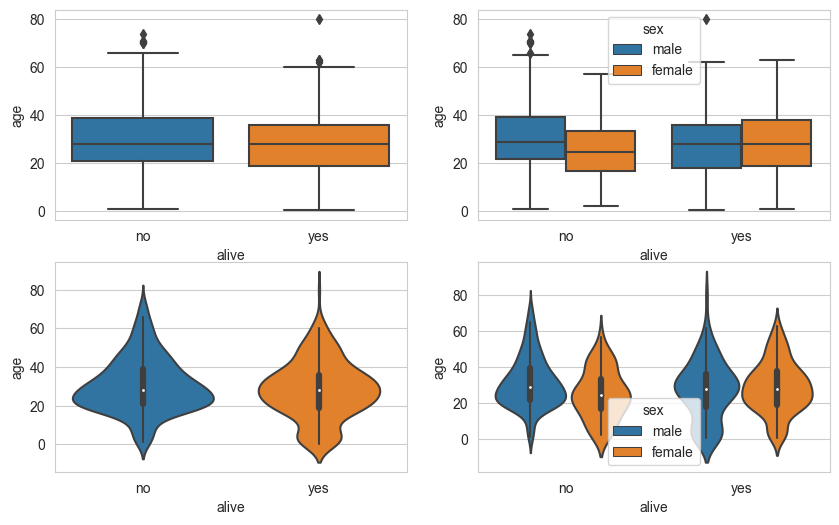

In [98]:
fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

# 박스플롯 기본값
sns.boxplot(
    x='alive',
    y='age',
    data=titanic,
    ax=ax1,
)
# 박스플롯 + hue
sns.boxplot(
    x='alive',
    y='age',
    data=titanic,
    ax=ax2,
    hue='sex'
)
# 바이올린그래프 기본값
sns.violinplot(
    x='alive',
    y='age',
    data=titanic,
    ax=ax3,
)
# 바이올린그래프 + hue
sns.violinplot(
    x='alive',
    y='age',
    data=titanic,
    ax=ax4,
    hue='sex'
)

ax1.set_title('')

plt.show()

> 해석
- 바이올린플롯으로 확인한 결과 age에는 이상치가 없음. (정규분포에서 벗어나 있을 뿐임)

---
### 조인트 그래프
- 산점도를 기본으로 하고 각 축에 대한 히스토그램을 동시 제공

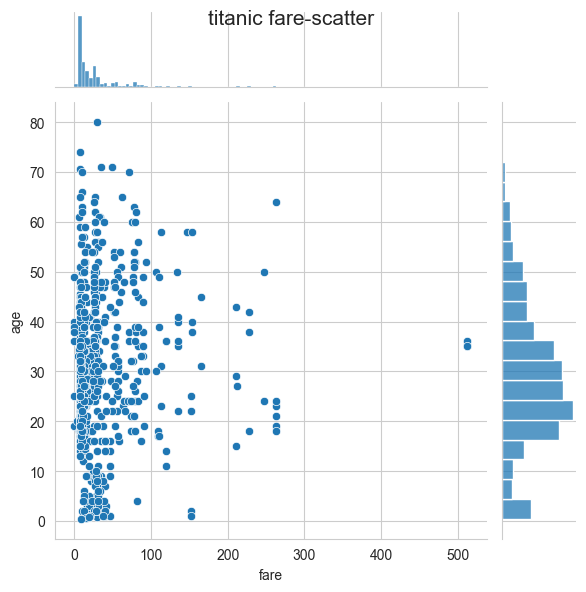

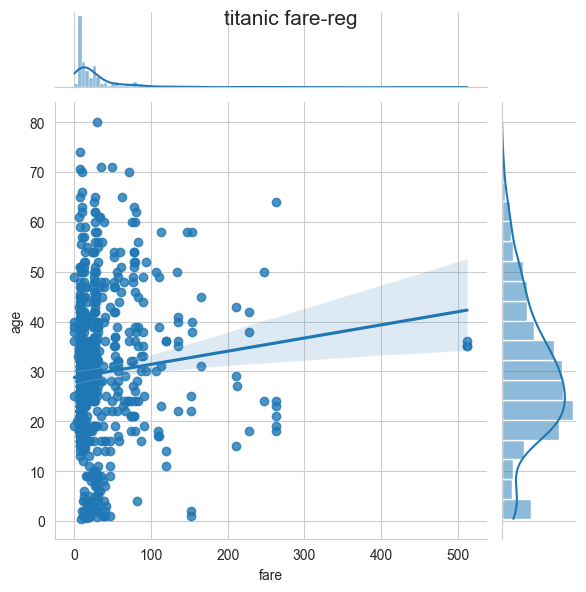

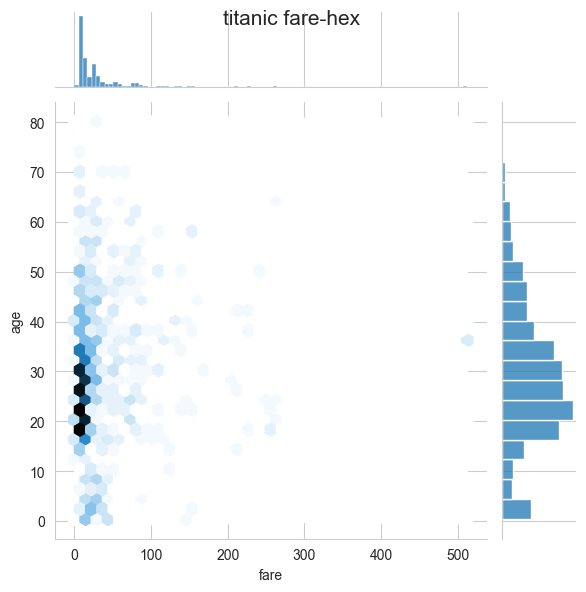

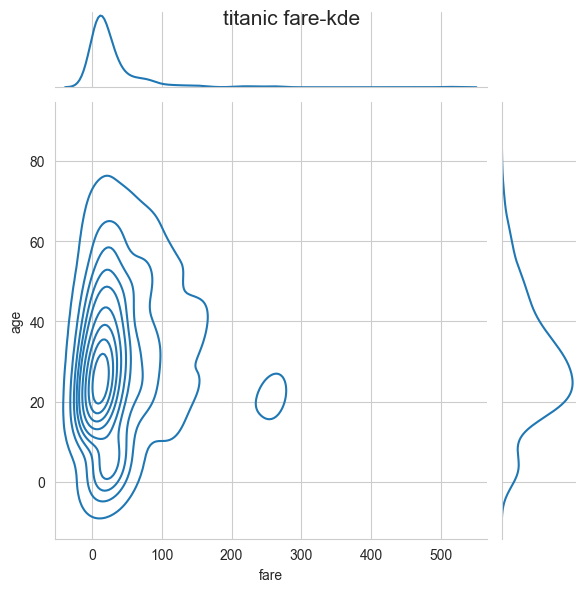

In [109]:
# 조인트 그래프 - 산점도
j1 = sns.jointplot(
    x='fare',
    y='age',
    data=titanic,
)
# 조인트 그래프 - 회귀선
j2 = sns.jointplot(
    x='fare',
    y='age',
    kind='reg',
    data=titanic,
)
# 조인트 그래프 - 육각그래프
j3 = sns.jointplot(
    x='fare',
    y='age',
    kind='hex',
    data=titanic,
)
# 조인트 그래프 - 커널 밀집 그래프
j4 = sns.jointplot(
    x='fare',
    y='age',
    kind='kde',
    data=titanic,
)
j1.fig.suptitle('titanic fare-scatter',size=15)
j2.fig.suptitle('titanic fare-reg',size=15)
j3.fig.suptitle('titanic fare-hex',size=15)
j4.fig.suptitle('titanic fare-kde',size=15)
plt.show()

> 해석
- fare는 대부분 100달러 미만이고 연령대는 20대가 가장 많다.

### 조건을 적용하여 화면을 그리드하기

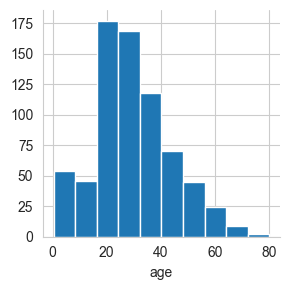

In [114]:
g = sns.FacetGrid(
    data=titanic,
)
g.map(plt.hist,'age')
plt.show()

---
### 이변수 데이터의 분포
- 매트릭스 형태로 짝을 지어 표현

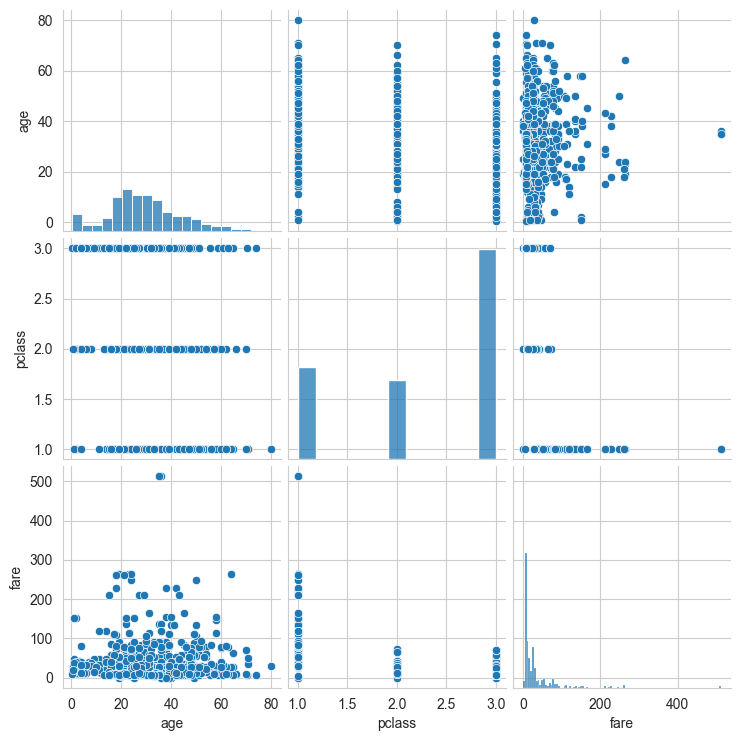

In [116]:
titanic_pair = titanic[['age','pclass','fare']]
sns.pairplot(
    titanic_pair
)
plt.show()